### BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation - Demo Notebook

In [ ]:
!pip install salesforce-lavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.8/495.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 KB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch

In [ ]:
from torchvision.datasets.utils import download_file_from_google_drive

In [ ]:
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load sample image
raw_image = Image.open(requests.get(url, stream=True).raw)

IMAGE CAPTIONING

In [ ]:
import torch
from lavis.models import load_model_and_preprocess
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# loads BLIP caption base model, with finetuned checkpoints on MSCOCO captioning dataset.
# this also loads the associated image processors
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)
# preprocess the image
# vis_processors stores image transforms for "train" and "eval" (validation / testing / inference)
raw_image = Image.open('/content/gdrive/MyDrive/newdronepics/3.jpg').convert("RGB")
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
model.generate({"image": image})
# ['a large fountain spewing water into the air']

ModuleNotFoundError: ignored

VQA

In [ ]:
from lavis.models import load_model_and_preprocess
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)
# ask a random question.
question = "how close are the cats"
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
# ['singapore']

['no cats']

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import cv2 as cv

In [ ]:
raw_image = Image.open('/content/gdrive/MyDrive/dronepics/1.jpg').convert("RGB")
# img = cv.imread('/content/gdrive/MyDrive/dronepics/1.jpg')

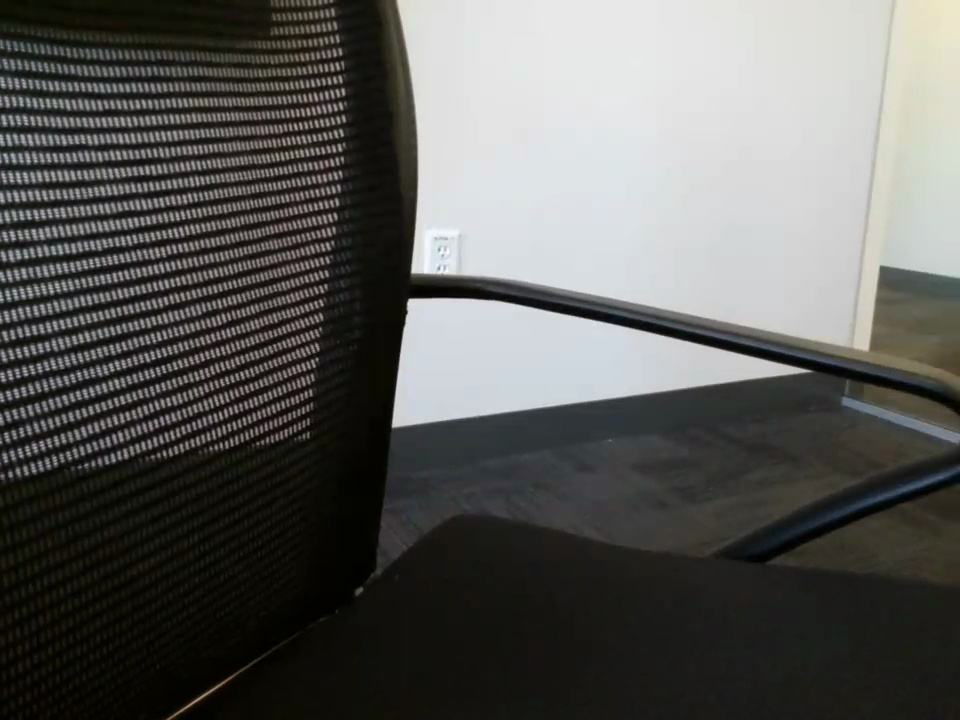

In [ ]:
raw_image = Image.open('/content/gdrive/MyDrive/newdronepics/3.jpg').convert("RGB")
raw_image

In [ ]:
from lavis.models import load_model_and_preprocess
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

In [ ]:
# ask a random question.
question = "how can i avoid the chair"
raw_image = Image.open('/content/gdrive/MyDrive/newdronepics/3.jpg').convert("RGB")
raw_image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)
model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")
# ['singapore']

["it doesn't have legs"]

How close are these images?


In [ ]:
for i in range(1, 4):
  question = "will i hit the chair"
  raw_image = Image.open('/content/gdrive/MyDrive/dronepics/' + str(i) + '.jpg').convert("RGB")
  raw_image
  image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
  question = txt_processors["eval"](question)
  model.predict_answers(samples={"image": image, "text_input": question}, inference_method="generate")